# Pandas Applications - Titanic Data Analysis

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## Leer los datos del archivo Excel

In [49]:
titanic_df = pd.read_excel("titanic.xls")

In [50]:
titanic_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [51]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [52]:
titanic_df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


## Formatear y limpiar los datos

In [53]:
titanic_df.drop(columns=['ticket', 'cabin', 'boat', 'body', 'sibsp', 'parch'], inplace=True)

In [58]:
titanic_df.head()

,pclass,survived,name,sex,age,fare,embarked,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,211.3375,S,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,151.5500,S,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,151.5500,S,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,151.5500,S,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,151.5500,S,"Montreal, PQ / Chesterville, ON"


In [98]:
titanic_df.rename(columns={'pclass':'clase',
                           'survived':'sobrevivio',
                           'name':'nombre', 
                           'sex':'sexo', 
                           'age':'edad',
                           'fare': 'ticket',
                           'embarked':'ptoEmbarque', 
                           'home.dest':'destino'}, inplace=True)

In [99]:
titanic_df.head()

,clase,sobrevivio,nombre,sexo,edad,ticket,ptoEmbarque,destino
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,211.3375,S,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,151.5500,S,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,151.5500,S,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,151.5500,S,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,151.5500,S,"Montreal, PQ / Chesterville, ON"


In [64]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   clase        1309 non-null   int64  
 1   sobrevivio   1309 non-null   int64  
 2   nombre       1309 non-null   object 
 3   sexo         1309 non-null   object 
 4   edad         1046 non-null   float64
 5   fare         1308 non-null   float64
 6   ptoEmbarque  1307 non-null   object 
 7   destino      745 non-null    object 
dtypes: float64(2), int64(2), object(4)
memory usage: 81.9+ KB


In [65]:
titanic_df.isnul().sum()

clase            0
sobrevivio       0
nombre           0
sexo             0
edad           263
fare             1
ptoEmbarque      2
destino        564
dtype: int64

In [84]:
titanic_df['edad'] = titanic_df['edad'].fillna(titanic_df['edad'].mean())

In [94]:
titanic_df.isnul().sum()

clase            0
sobrevivio       0
nombre           0
sexo             0
edad             0
fare             1
ptoEmbarque      2
destino        564
dtype: int64

## ¿Cuál fué la probabilidad de supervivencia en el Titanic?

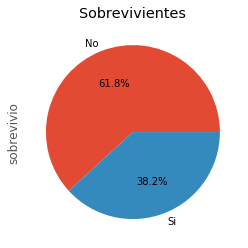

In [86]:
surv_count = pd.value_counts(titanic_df['sobrevivio'])
surv_count.index = ['No', 'Si']
surv_count.plot.pie(autopct="%.1f%%")
plt.title("Sobrevivientes")
plt.show()

In [87]:
print(f"Tasa de supervivencia: {titanic_df['sobrevivio'].mean():.2f}")

Tasa de supervivencia: 0.38


## ¿Cuál fue la tasa de supervicencia en el Titanic considerando el sexo de la persona?

In [92]:
superv_por_sexo = titanic_df.groupby(['sexo']).mean()[['sobrevivio', 'edad']]
superv_por_sexo

,sobrevivio,edad
sexo,,
female,0.727468,28.886935
male,0.190985,30.430716


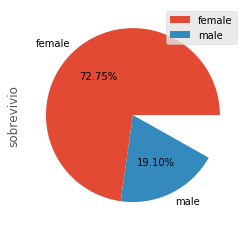

In [93]:
superv_por_sexo.plot.pie(y='sobrevivio', autopct="%.2f%%")
plt.show()

## ¿Existe alguna relación entre la edad de los pasajeros y el precio de los tickets?

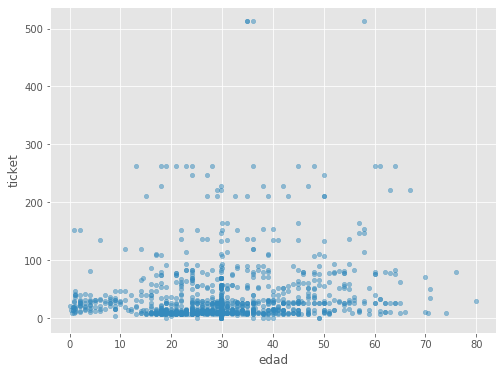

In [107]:
ticket_edad_df = titanic_df[['ticket', 'edad']]
ticket_edad_df.plot.scatter(x='edad', y='ticket', alpha=0.5, figsize=(8, 6))
plt.show()

## ¿Cuánto costaba el ticket por puerto de embarque y cuantas personas embarcaron en cada puerto?

In [134]:
ticket_embarque_df = titanic_df[['ptoEmbarque', 'ticket']].groupby('ptoEmbarque').agg({'ticket':'mean', 'ptoEmbarque':'count'})
ticket_embarque_df

,ticket,ptoEmbarque
ptoEmbarque,,
C,62.336267,270
Q,12.409012,123
S,27.418824,914


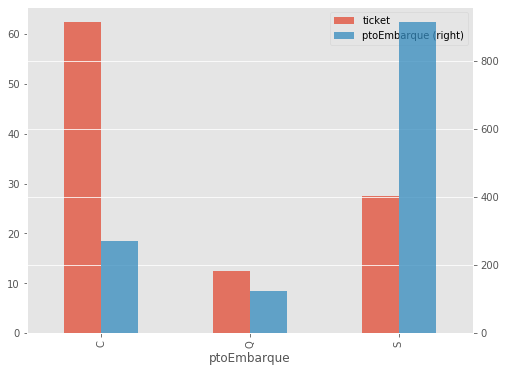

In [138]:
ticket_embarque_df.plot.bar(secondary_y=['ptoEmbarque'], alpha=0.75, figsize=(8, 6))
plt.show()

## ¿Cómo se distribuye la probabilidad de supervivencia en el Titanic segun sexo y edad?

In [142]:
titanic_df.groupby(['sexo', 'clase']).mean()[['sobrevivio', 'edad']]

sobrevivio       edad
sexo   clase                       
female 1        0.965278  36.490920
       2        0.886792  27.566605
       3        0.490741  24.465552
male   1        0.340782  39.285410
       2        0.146199  30.744375
       3        0.152130  27.106930

## ¿Cómo se distribuye la probabilidad de supervivencia en el Titanic segun sexo y clase social?

In [143]:
titanic_df[titanic_df['edad'] < 18].groupby(['sexo', 'clase']).mean()[['sobrevivio', 'edad']]

sobrevivio       edad
sexo   clase                       
female 1        0.875000  14.125000
       2        1.000000   8.273150
       3        0.543478   8.416667
male   1        0.857143   9.845243
       2        0.733333   6.222220
       3        0.233333   9.838888

## ¿Cuál es la distribución de supervivencia por edad?

In [156]:
sobrev_por_edad_df = titanic_df[titanic_df['sobrevivio'] == 1]['edad']
sobrev_por_edad_df

0       29.0000
1        0.9167
5       48.0000
6       63.0000
8       53.0000
         ...   
1261    63.0000
1277    22.0000
1286    38.0000
1290    47.0000
1300    15.0000
Name: edad, Length: 500, dtype: float64

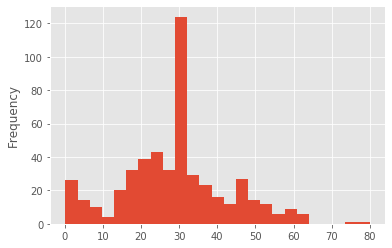

In [161]:
sobrev_por_edad_df.plot.hist(bins=25)
plt.show()